In [1]:
%matplotlib notebook
%pylab
%matplotlib inline

import pandas as pd
import glob

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
def read_gauge_data(gauge_file):
    """
    Read gauge data from a guage file.
    """
    with open(gauge_file) as f:
        data = f.read().splitlines()
        data2 = []
        for i in range(2,len(data)):
            data[i] = data[i].split()
            data2.append([float(x) for x in data[i]])
            
    data1 = array(data2)
    # print(data1.shape)
    levels = data1[:, 0]
    time = data1[:, 1]
    h = data1[:, 2]
    hu = data1[:, 3]
    hv = data1[:, 4]
    eta = data1[:, 5]

    u = zeros(len(hu))
    v = zeros(len(hv))
    for i in range(len(hu)):
        if h[i] == 0:
            u[i] = 0
        else:
            u[i] = hu[i]/h[i]
            v[i] = hv[i]/h[i]

    return time, h,eta,sqrt(u**2 + v**2)


def read_valid(gauge_file):
    """
    Read gauge data from a literature data.
    """
    with open(gauge_file) as f:
        data = f.read().splitlines()
        data1 = []
        for i in range(1,len(data)):
            data[i] = data[i].split()
            data1.append([float(x) for x in data[i]])
            
    data1 = array(data1)
    guage = data1[:,0]
    z = data1[:,1]
    h_max = data1[:,2]
    eta_max = data1[:,3]

    return h_max, eta_max

In [3]:
time,h,eta, topo = read_gauge_data("gauge00000.txt")
# print time, h, eta, topo
print('time =  ', time/3600)
print('h = ', h)
print('eta = ', eta)
# print('topo = ', topo)

time =   [ 0.          0.33103447  0.66206897  0.99310344  1.32413794  1.65517242
  1.98620689  2.31724139  2.64827586  2.97931028  3.31034472  3.64137944
  3.97241389  4.30344833  4.63448278  4.96551722  5.29655167  5.62758611
  5.95862056  6.28965528  6.62068972  6.95172417  7.28275861  7.61379306
  7.9448275   8.27586194  8.60689667  8.93793111  9.26896556  9.6
  9.93103444 10.26206889 10.59310333 10.92413806 11.2551725  11.58620694
 11.91724139 12.24827583 12.57931028 12.91034472 13.24137944 13.57241389
 13.90344833 14.23448278 14.56551722 14.89655167 15.22758611 15.55862056
 15.88965528 16.22068972 16.55172417 16.88275861 17.21379306 17.5448275
 17.87586194 18.20689667 18.53793111 18.86896556 19.2        19.53103444
 19.86206889 20.19310333 20.52413806 20.8551725  21.18620694 21.51724139
 21.84827583 22.17931028 22.51034472 22.84137944 23.17241389 23.50344833
 23.83448278 24.16551722 24.49655167 24.82758611 25.15862056 25.48965528
 25.82068972 26.15172417 26.48275861 26.81379306 2

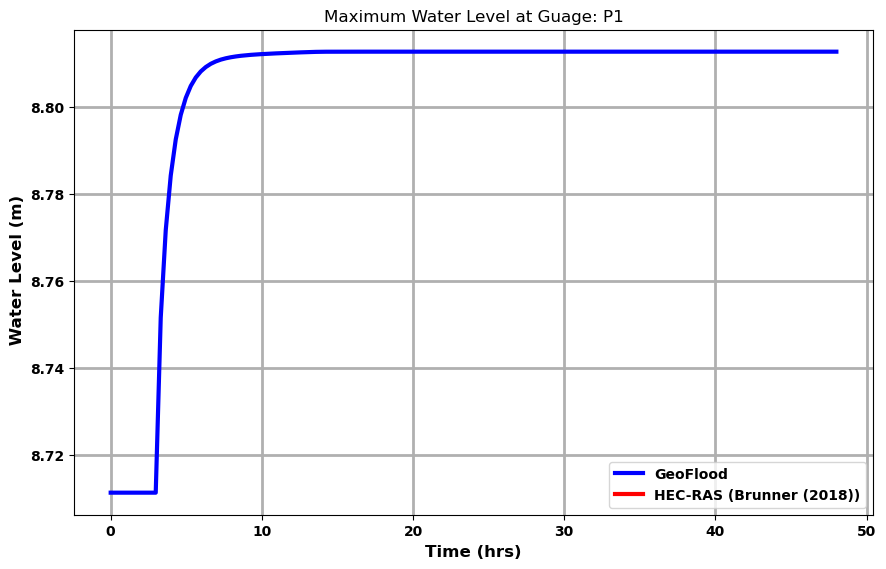

In [4]:
time,h,eta, topo = read_gauge_data("gauge00011.txt")
# plot the data
figsize(10.30, 6.30)
# figure(figsize=(13.22, 8.90), dpi=300)
# rcParams['font.family'] = 'Arial'
figure(5)
plot(time/3600,eta[0]+h,'b-',label='GeoFlood',linewidth=3)
# plot (time/3600,[10.35]*len(h),'g--',label='GeoClaw',linewidth=3)
# plot (time/3600,[10.25]*len(h),'k--',label='Valid',linewidth=3)
# plot(geoclaw_maxeta,'r-o',label='GeoClaw')

# axis([0, 20, 8.0, 8.80])

# line = Line2D([0], [0], label='HEC-RAS', color='r', linewidth=3)
ylabel(' Water Level (m)', fontdict={'fontsize': 12, 'fontweight': 'bold'})
xlabel('Time (hrs)', fontdict={'fontsize': 12, 'fontweight': 'bold'})

# legend(handles=handles, prop={'size': 10, 'weight': 'bold'},frameon=False)
colors = ['blue', 'red']
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
labels = ['GeoFlood','HEC-RAS (Brunner (2018))']
legend(lines, labels,prop={'size': 10, 'weight': 'bold'})
#  show a legend without plotting anything

# time_n = arange(0,50,2)
# pstr = ([f'{N:d}' for N in time_n])
# xticks(time_n,pstr)
#  show the last point on the x axis
# y_n = arange(8.00,8.80,0.1)
# pstr = ([f'{N:.2f}' for N in y_n])
# yticks(y_n,pstr)

rcParams['axes.labelweight'] = 'bold'
xticks(fontweight='bold')
yticks(fontweight='bold')
title('Maximum Water Level at Guage: P1')
grid(linewidth=2)

show()

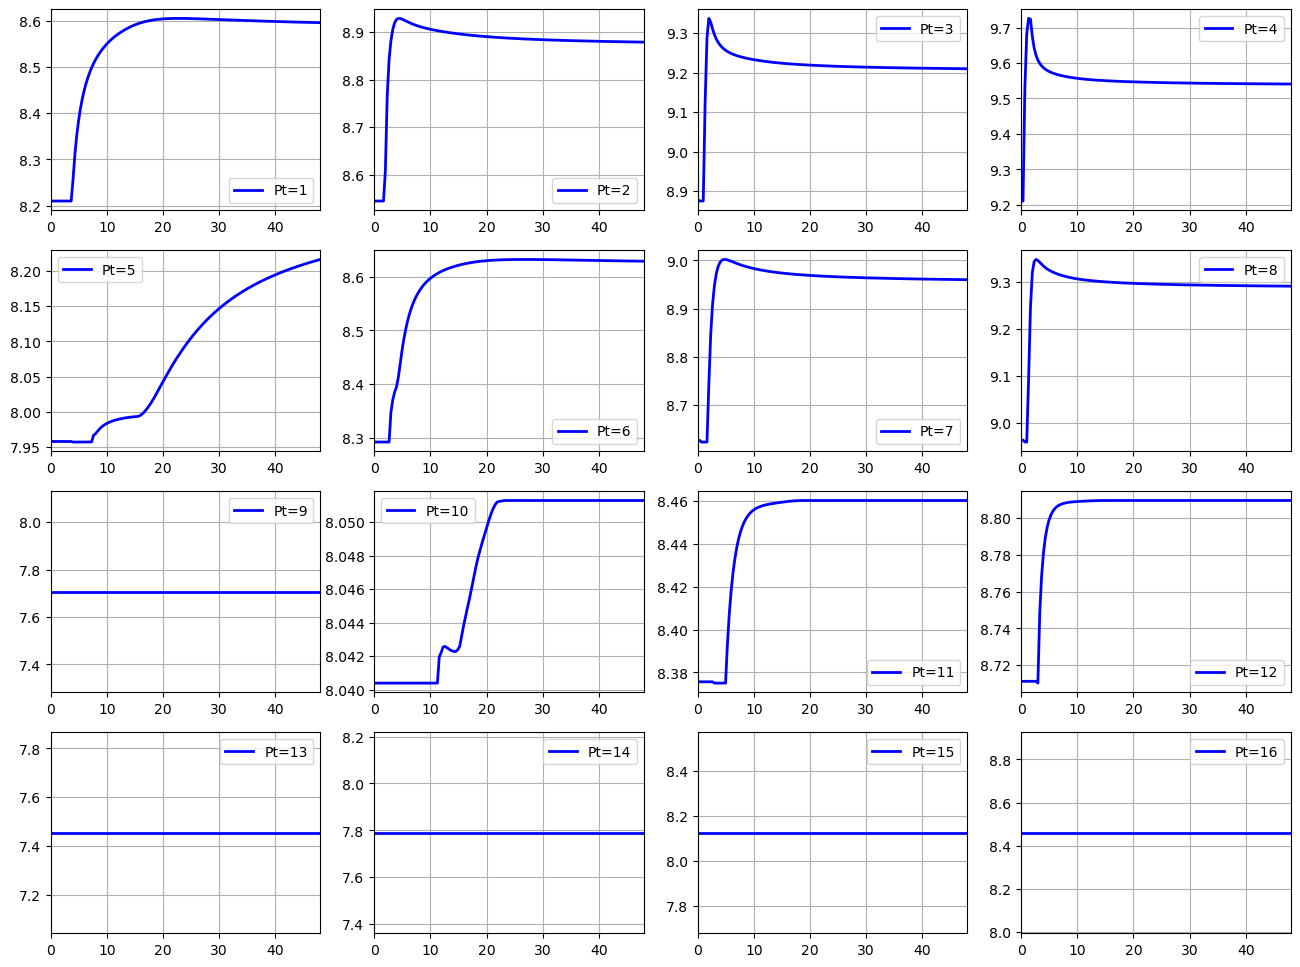

In [11]:
# write a function taht reads all the gauge data and plot them into 16 subplots
import matplotlib.pyplot as plt
def plot_gauge():
    #  look for all gauge files
    gauge_files = glob.glob('gauge*.txt')
    # sort the files
    gauge_files.sort()
    # print(gauge_files)
    figsize(16, 12)
    colours = ['red', 'green', 'blue', 'purple', 'orange', 'gray', 'brown', 'pink', 'olive', 'teal', 'navy', 'maroon', 'coral', 'gold', 'indigo', 'turquoise']
    for gauge in range(len(gauge_files)):
        time, h,eta, topo = read_gauge_data(gauge_files[gauge])
        # plot the data
        subplot(4,4,gauge+1)
        plot(time/3600,eta,color='b',label=f'Pt={gauge+1}',linewidth=2)
        # plot(time/3600,eta,color=colours[gauge],label=f'Pt={gauge+1}',linewidth=2)
        
        # if gauge < 12:
        #     xticks([])  
        # add a legend
        xlim(0,48)
        grid()
        legend(loc='best')
plot_gauge()

In [10]:
len(eta)

146

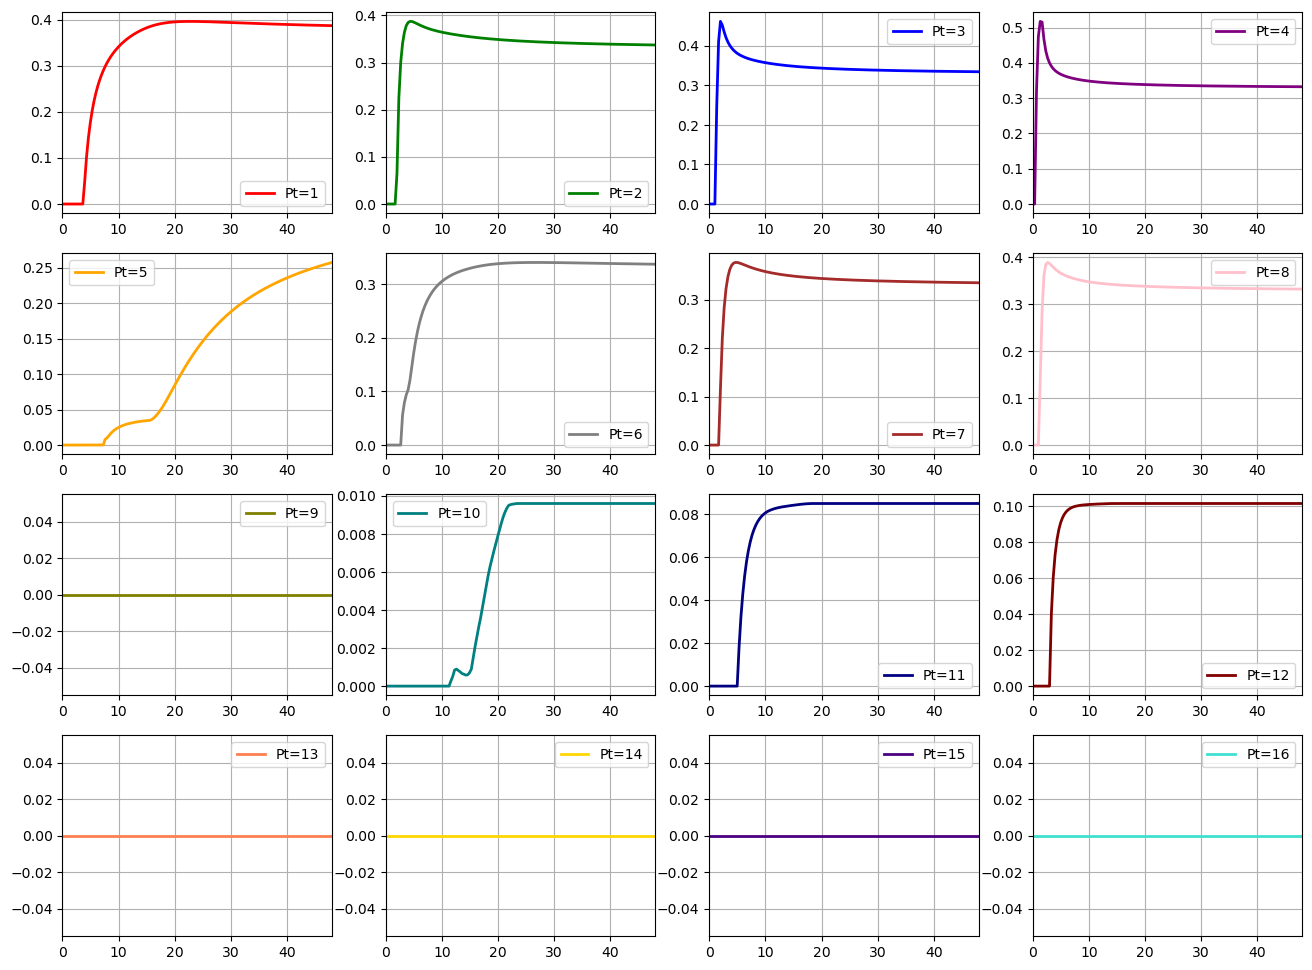

In [6]:
def plot_gauge():
    #  look for all gauge files
    gauge_files = glob.glob('gauge*.txt')
    # sort the files
    gauge_files.sort()
    # print(gauge_files)
    figsize(16, 12)
    colours = ['red', 'green', 'blue', 'purple', 'orange', 'gray', 'brown', 'pink', 'olive', 'teal', 'navy', 'maroon', 'coral', 'gold', 'indigo', 'turquoise']
    for gauge in range(len(gauge_files)):
        time, h,eta, topo = read_gauge_data(gauge_files[gauge])
        # plot the data
        subplot(4,4,gauge+1)
        plot(time/3600,h ,color=colours[gauge],label=f'Pt={gauge+1}',linewidth=2)
        
        # if gauge < 12:
        #     xticks([])  
        # add a legend
        xlim(0,48)
        grid()
        legend(loc='best')
plot_gauge()

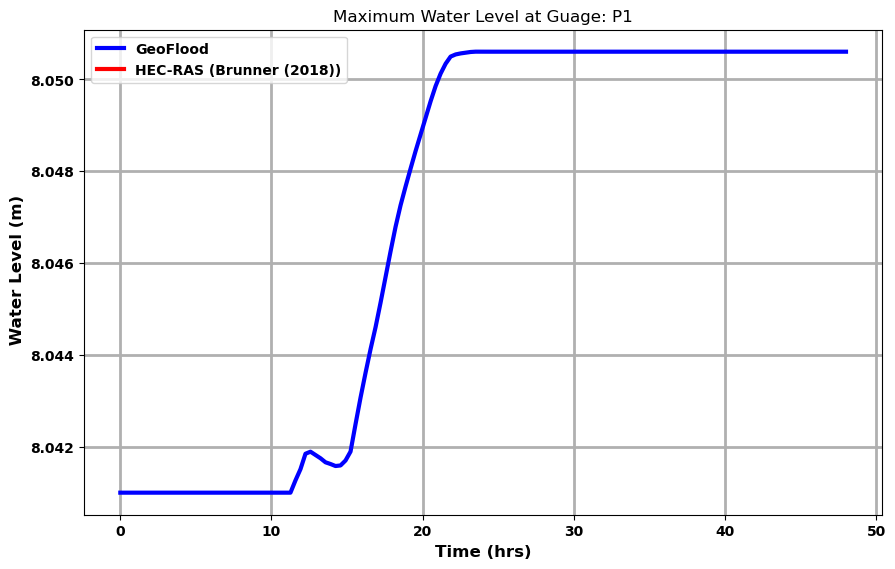

In [7]:
time,h,eta, topo = read_gauge_data("gauge00009.txt")
# plot the data
figsize(10.30, 6.30)
# figure(figsize=(13.22, 8.90), dpi=300)
# rcParams['font.family'] = 'Arial'
figure(5)
plot(time/3600,8.041+h,'b-',label='GeoFlood',linewidth=3)
# plot (time/3600,[10.35]*len(h),'g--',label='GeoClaw',linewidth=3)
# plot (time/3600,[10.25]*len(h),'k--',label='Valid',linewidth=3)
# plot(geoclaw_maxeta,'r-o',label='GeoClaw')

# axis([0, 20, 8.0, 8.80])

# line = Line2D([0], [0], label='HEC-RAS', color='r', linewidth=3)
ylabel(' Water Level (m)', fontdict={'fontsize': 12, 'fontweight': 'bold'})
xlabel('Time (hrs)', fontdict={'fontsize': 12, 'fontweight': 'bold'})

# legend(handles=handles, prop={'size': 10, 'weight': 'bold'},frameon=False)
colors = ['blue', 'red']
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
labels = ['GeoFlood','HEC-RAS (Brunner (2018))']
legend(lines, labels,prop={'size': 10, 'weight': 'bold'})
#  show a legend without plotting anything

# time_n = arange(0,50,2)
# pstr = ([f'{N:d}' for N in time_n])
# xticks(time_n,pstr)
#  show the last point on the x axis
# y_n = arange(8.00,8.80,0.1)
# pstr = ([f'{N:.2f}' for N in y_n])
# yticks(y_n,pstr)

rcParams['axes.labelweight'] = 'bold'
xticks(fontweight='bold')
yticks(fontweight='bold')
title('Maximum Water Level at Guage: P1')
grid(linewidth=2)

show()

In [8]:
eta[-1]
time[-1]/3600

48.0

### 10m grid resolution

In [9]:
# write a function taht reads all the gauge data and plot them into 16 subplots
import matplotlib.pyplot as plt
def plot_gauge():
    #  look for all gauge files
    gauge_files = glob.glob('result_10/gauge*.txt')
    gg = glob.glob('gauge*.txt')
    # sort the files
    gauge_files.sort()
    # print(gauge_files)
    figsize(16, 12)
    colours = ['red', 'green', 'blue', 'purple', 'orange', 'gray', 'brown', 'pink', 'olive', 'teal', 'navy', 'maroon', 'coral', 'gold', 'indigo', 'turquoise']
    for gauge in range(len(gauge_files)):
        time, h,eta, topo = read_gauge_data(gauge_files[gauge])
        timeg, hg,etag, topog = read_gauge_data(gauge_files[gg])
        # plot the data
        subplot(4,4,gauge+1)
        plot(time[:len(timeg)]/3600,eta[:len(timeg)],label=f'Pt={gauge+1}',linewidth=2)
        plot(timeg/3600,etag,label=f'Pt={gauge+1}',linewidth=2)
        
        # if gauge < 12:
        #     xticks([])  
        # add a legend
        xlim(0,48)
        grid()
        legend(loc='best')
plot_gauge()

TypeError: list indices must be integers or slices, not list